# **ML Model to Predict Profit**

In [ ]:
# Importing Libraries #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [ ]:
# Importing Dataset #
dataset = pd.read_csv("50_Startups.csv")

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


## **Exploratory Data Analysis**

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.isnull().sum() # No null values in any column

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


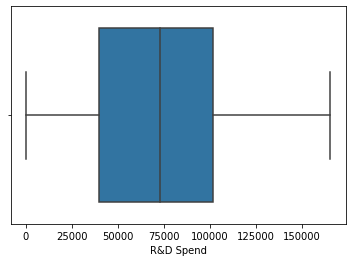

In [ ]:
sns.boxplot(dataset["R&D Spend"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


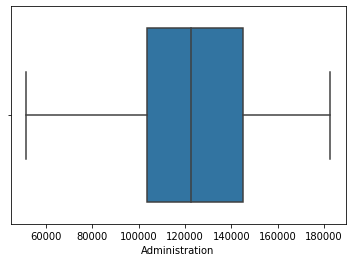

In [ ]:
sns.boxplot(dataset["Administration"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


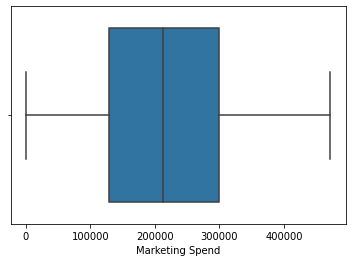

In [ ]:
sns.boxplot(dataset["Marketing Spend"])

In [ ]:
# Checking for correlation #
c = dataset.corr()
print(c)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


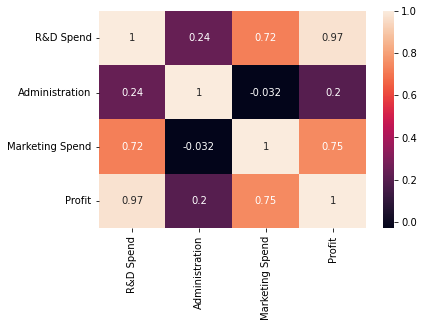

In [ ]:
# Using data visualization libraries for understanding dataset
# 1 - Dataset Heatmap
sns.heatmap(c,annot=True)
plt.show()

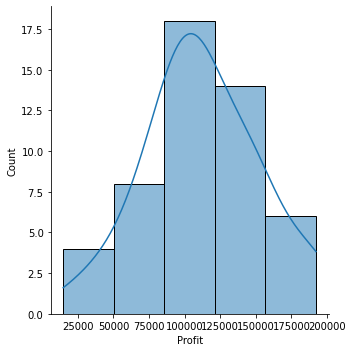

In [ ]:
# 2 - Histogram for profits
sns.displot(dataset['Profit'], bins = 5, kde=True)
plt.show()

## **Linear Regression Model**

In [ ]:
# Extracting feature columns and target column from the dataset for training and testing the model
X1 = dataset.iloc[:,0:3]
Y1 = dataset.iloc[:,-1:]

In [ ]:
# Removing the 'Administration' and 'Marketing Spend' columns from the feature set for training the mode
X1 = X1.drop(["Administration","Marketing Spend"], axis =1)

In [ ]:
# Scaling Data for Linear Regression Model
sc_X = StandardScaler()
sc_y = StandardScaler()
X1 = sc_X.fit_transform(X1)
Y1 = sc_y.fit_transform(Y1)

In [ ]:
# Train Test Splitting for Linear Regression Model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,Y1,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [ ]:
# Creating an instance of LinearRegression model for linear regression tasks
linreg = LinearRegression()

In [ ]:
# Fit the training data in Linear Regression Model
linreg.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
# Evaluate the performance of Linear Regression Model
y1_pred = linreg.predict(X1_test)
r21 = r2_score(y1_test, y1_pred)
rmse1 = sqrt(mean_squared_error(y1_test, y1_pred))

## **Decision Tree Regression Model**

In [ ]:
# Extracting feature columns and target column from the dataset for training and testing the model
X2 = dataset.iloc[:,0:3]
Y2 = dataset.iloc[:,-1:]

In [ ]:
# Scaling Data for Decision Tree Regression Model
sc_X = StandardScaler()
sc_y = StandardScaler()
X2 = sc_X.fit_transform(X2)
Y2 = sc_y.fit_transform(Y2)

In [ ]:
# Train Test Splitting for Linear Regression Model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [ ]:
# Creating an instance of DecisionTreeRegressor model for regression tasks
dectree = DecisionTreeRegressor()

In [ ]:
# Fit the training data in Decision Tree Regression Model
dectree.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [ ]:
# Evaluate the performance of Decision Tree Regression Model
y2_pred = dectree.predict(X2_test)
r22 = r2_score(y2_test, y2_pred)
rmse2 = sqrt(mean_squared_error(y2_test, y2_pred))

## **SVM Regression Model**

In [ ]:
# Scaling Data for SVM Regression Model
sc_X = StandardScaler()
sc_y = StandardScaler()
X3 = sc_X.fit_transform(X1)
Y3 = sc_y.fit_transform(Y1)
X4 = sc_X.fit_transform(X2)
Y4 = sc_y.fit_transform(Y2)

In [ ]:
# Train Test Splitting for SVM Regression Model
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y3,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,Y4,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [ ]:
# Fit the training data in SVM Regression Model
regressor1 = SVR(kernel='rbf')
regressor1.fit(X3_train,y3_train)

regressor2 = SVR(kernel='rbf')
regressor2.fit(X4_train,y4_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# Evaluate the performance of SVM Regression Model
y3_pred = regressor1.predict(X3_test)
r23 = r2_score(y3_test, y3_pred)
rmse3 = sqrt(mean_squared_error(y3_test, y3_pred))

y4_pred = regressor2.predict(X4_test)
r24 = r2_score(y4_test, y4_pred)
rmse4 = sqrt(mean_squared_error(y4_test, y4_pred))

In [ ]:
# Comparing the performance of Linear Regression, Decision Tree Regression, and SVM Regression models using R2 score and RMSE as evaluation metrics
print(f"\nModel: Linear Regression")
print(f"R2 Score: {r21}")
print("RMSE: ", rmse1)

print(f"\nModel: Decision Tree Regression")
print(f"R2 Score: {r22}")
print("RMSE: ", rmse2)

print(f"\nModel: SVM Regression 1")
print(f"R2 Score: {r23}")
print("RMSE: ", rmse3)

print(f"\nModel: SVM Regression 2")
print(f"R2 Score: {r24}")
print("RMSE: ", rmse4)


Model: Linear Regression
R2 Score: 0.936575910876378
RMSE:  0.1573966762367871

Model: Decision Tree Regression
R2 Score: 0.897233449017094
RMSE:  0.2003522980922482

Model: SVM Regression 1
R2 Score: 0.8943027577192164
RMSE:  0.20318903413518735

Model: SVM Regression 2
R2 Score: 0.8559496411202611
RMSE:  0.23720596718672451


We can clearly see that out of the different models we tried, Linear Regression is the one with the least error in prediction.

**Hence, Linear Regression is the best model out of all three.**